In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import seaborn as sns
import time
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as backend_inline

backend_inline.set_matplotlib_formats("svg")


# Pytorch device specific configuration
# Pytorch Gpu Configuration
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# For Directml Gpu Configurations
import torch_directml

device = torch_directml.device()

# Set default device
torch.set_default_device(device)

# # Font update global for all plots
# plt.rcParams.update({"font.size": 18})

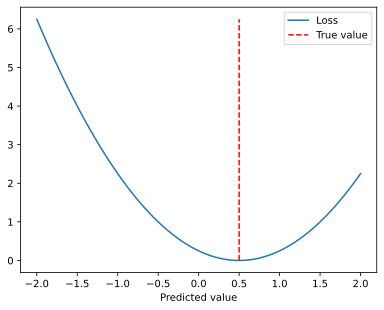

In [5]:
# Loss Function
lossFunMSE = nn.MSELoss()

# Create Predictions and real answer
yHat = torch.linspace(-2, 2, 101)
y = torch.tensor(0.5)

# Compute the MSE loss function
L = np.zeros(101)
for i, yy in enumerate(yHat):
    L[i] = lossFunMSE(yy, y)

plt.plot(yHat.cpu(), L, label="Loss")
plt.plot([y.cpu(), y.cpu()], [0, np.max(L)], "r--", label="True value")
plt.xlabel("Predicted value")
plt.legend()
plt.show()

## Binary cross-entropy

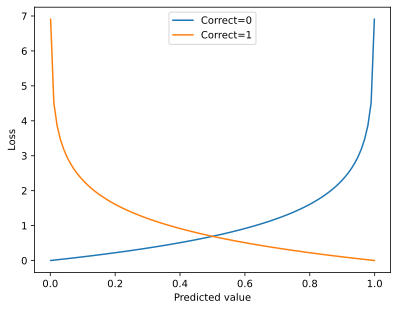

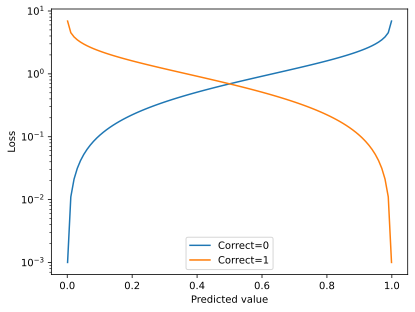

In [ ]:
# Loss Function
lossFunBCE = nn.BCELoss()

# Create Predictions and real answer
yHat = torch.linspace(0.001, 0.999, 101)
y1 = torch.tensor(0.0)
y2 = torch.tensor(1.0)

# Comput BCE Loss
L = np.zeros((101, 2))
for i, yy in enumerate(yHat):
    L[i, 0] = lossFunBCE(yy, y1)  # Correct answer is 0
    L[i, 1] = lossFunBCE(yy, y2)  # Correct answer is 1

plt.plot(yHat.cpu(), L)
plt.xlabel("Predicted value")
plt.ylabel("Loss")
plt.legend(["Correct=0", "Correct=1"])
plt.show()

# With Log scale
plt.plot(yHat.cpu(), L)
plt.xlabel("Predicted value")
plt.ylabel("Loss")
plt.legend(["Correct=0", "Correct=1"])
plt.yscale("log")
plt.show()

In [ ]:
# Can we pass raw output of the model to BCE loss
# Raw output of the model
yHat = torch.tensor(2.0)
# print(
#     lossFunBCE(yHat, y2)
# )  # Gives this error RuntimeError: all elements of input should be between 0 and 1

# Convert to probabely via sigmoid
sig = nn.Sigmoid()
print(lossFunBCE(sig(yHat), y2))

tensor(0.1269, device='privateuseone:0')


In [ ]:
# Now let's check the BCEwithLogistLoss Can it take the raw output of the model
lossFunBCELog = nn.BCEWithLogitsLoss()
print(
    lossFunBCELog(yHat, y2)
)  # Does not show any error and is recommended insted of BCELoss

tensor(0.1269, device='privateuseone:0')
